<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/5_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Neste exercício, vamos verificar como usar o Pytorch para fazer uma classificação binária. Isto é, classificar uma entrada como pertencente à classe A ou B.

O código à seguir cria dados usando distribuições gaussianas em um espaço bi-dimensional. Teremos:


*   x: uma matriz com 200 entradas de 2 dimensões cada
*   y: um vetor com 200 valores indicando a que classe cada linha da mariz pertence (0: classe A e 1: classe B)



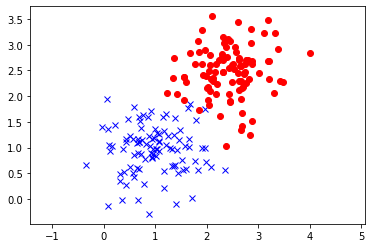

In [2]:
N=100
centrosClasseA = ((1,1))
centrosClasseB = ((2.5,2.5))
cov = [[0.25, 0], [0, 0.25]] 

xA = np.random.multivariate_normal(centrosClasseA, cov, N)
xB = np.random.multivariate_normal(centrosClasseB, cov, N)
x = np.concatenate((xA,xB), axis=0)
y = np.concatenate((np.zeros((N,1)),np.ones((N,1))), axis=0)

A = np.where(y==0)[0]
B = np.where(y==1)[0]

plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
plt.axis('equal');

Vamos criar uma rede neural com duas entradas e apenas uma camada (um neurônio de saída). Ao final, a saída do neurônio será aplicada à função sigmoide. 

Se a saída final for maior ou igual a 0.5, vamos interpretar que a entrada foi classificada como classe B (50% de chance ou mais de pertencer à classe B).

Caso contrário, vamos classificar a entrada como classe A.

In [3]:
nInputs = 2
nOutput = 1

model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nOutput),
    torch.nn.Sigmoid(),
    ) 

Verificando a possibilidade de usar a GPU:

In [4]:
if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


Na célula a seguir, definimos a função de erro (criterion) como BCELoss, que é a entropia cruzada binária.

Continuaremos usando o SGD como método de implementação do Gradient Descent.

In [5]:
learningRate = 0.05 

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)      

A célula a seguir já é nossa velha conhecida.

Epoch:0 errors: 0.9721647500991821
Epoch:200 errors: 0.4801153540611267
Epoch:400 errors: 0.35093092918395996
Epoch:600 errors: 0.28074029088020325
Epoch:800 errors: 0.23740333318710327


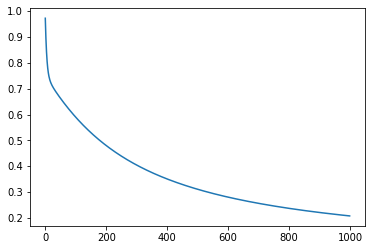

In [6]:
x_train = x
y_train = y
def train_model(nEpochs = 10):
  errors=[]
  for epoch in range(nEpochs):
    if torch.cuda.is_available():
      inputs = torch.tensor(x_train, dtype=torch.float32).to('cuda')
      targets = torch.tensor(y_train, dtype=torch.float32).to('cuda')
    else:
      inputs = torch.tensor(x_train, dtype=torch.float32)
      targets = torch.tensor(y_train,  dtype=torch.float32)    
    # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
    optimizer.zero_grad()
    # calculamos a saída da rede
    outputs = model(inputs)
    # calcula o erro
    loss = criterion(outputs, targets)
    # calcula os gradientes
    loss.backward()
    # atualiza parâmetros 
    optimizer.step()
    errors.append(loss.item())

    if(not epoch%200):
      print('Epoch:' + str(epoch) + ' errors: ' + str(loss.item()))
  return errors

errors = train_model(1000) 
plt.plot(errors)

Vemos o erro caindo constantemente após executadas todas as épocas. 

Vamos ver agora qual é a linha divisória (temos apenas uma camada, lembre-se) no espaço de entrada. Podemos verificar isso usando os pesos e bias do modelo e verificando quando o resultado é zero (saída 0.5, na sigmóide).

(-1.2500161955555669,
 4.250340106666902,
 -0.48020564585778436,
 3.745927712022833)

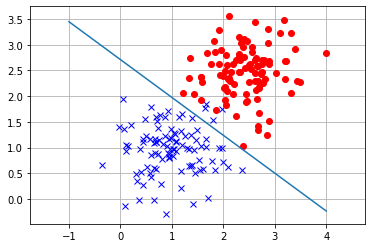

In [7]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    inputs = torch.tensor(x_train, dtype=torch.float32).to('cuda')
  else:
    inputs = torch.tensor(x_train, dtype=torch.float32)
  saidas = model(inputs)

plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
xt = np.linspace(-1,4,100)
b = model[0].bias.detach().numpy()
w = model[0].weight.detach().numpy()[0]
yt = (-b - xt*w[0])/w[1]
plt.plot(xt,yt)
plt.grid('both')
plt.axis('equal')
#plt.axis([0.9*x.min(), 1.1*x.max(), 0.9*x.min(), 1.1*x.max()]);

Ok. Tarefa cumprida. Apesar de algumas classificações erradas, o modelo fez um bom trabalho.

Mas, novamente, é uma tarefa extremamente simples. Vamos complicar um pouco, deixando a classes com um arranjo diferente no espaço de entrada.

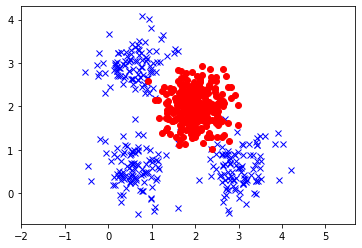

In [8]:
N=100
centrosClasseA = ((0.6,0.6),(0.6,3),(3,0.6))
centrosClasseB = ((2.,2.))
cov = [[0.15, 0], [0, 0.15]] 

x = np.random.multivariate_normal(centrosClasseA[0], cov, N)
y = np.zeros((N,1))
x = np.concatenate((x,np.random.multivariate_normal(centrosClasseA[1], cov, N)), axis=0)
y = np.concatenate((y,np.zeros((N,1))),axis=0)

x = np.concatenate((x,np.random.multivariate_normal(centrosClasseA[2], cov, N)), axis=0)
y = np.concatenate((y,np.zeros((N,1))),axis=0)

x = np.concatenate((x,np.random.multivariate_normal(centrosClasseB, cov, 3*N)), axis=0)
y = np.concatenate((y,np.ones((3*N,1))),axis=0)


A = np.where(y==0)[0]
B = np.where(y==1)[0]

plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
plt.axis('equal');

Perceba que foram usadas três distribuições diferentes para gerar os dados da classe A. Para a classe B, foi usada apenas uma distribuição, mas com mais dados, para equilibrar a quantidade de amostras de cada classe. Após executar este exercício, mude a linha 14, criando apenas N amostras da classe B. Você verá que o classificador será praticamente "dominado" pela classe A.


Nas células a seguir, vamos repetir os passos usados para a distribuição mais simples:

- criar o modelo
- definir função de erro e otimizador
- treinar
- mostrar a linha divisória



In [9]:
nInputs = 2
nOutput = 1
model = torch.nn.Linear(nInputs, nOutput)

model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nOutput),
    torch.nn.Sigmoid(),
    ) 

In [11]:
if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


In [12]:
learningRate = 0.5 

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) 

Epoch:0 errors: 1.0245262384414673
Epoch:200 errors: 0.531796395778656
Epoch:400 errors: 0.517692506313324
Epoch:600 errors: 0.5141857266426086
Epoch:800 errors: 0.5130319595336914


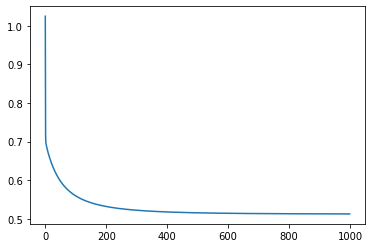

In [13]:
x_train = x
y_train = y
errors = train_model(1000) 
plt.plot(errors)

(-1.260384022776343, 4.468064478303203, -0.7196092451440873, 4.682479645345361)

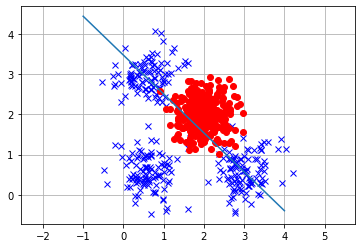

In [14]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    inputs = torch.tensor(x_train, dtype=torch.float32).to('cuda')
  else:
    inputs = torch.tensor(x_train, dtype=torch.float32)
  saidas = model(inputs)
  plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
xt = np.linspace(-1,4,100)
b = model[0].bias.detach().numpy()
w = model[0].weight.detach().numpy()[0]
yt = (-b - xt*w[0])/w[1]
plt.plot(xt,yt)
plt.grid('both')
plt.axis('equal')

A essa altura, talvez vocâ já soubesse o que iria acontecer, mas o gráfico deixa claro que não foi possível realizar uma boa divisão no espaço.

O que vamos tentar agora? 

Sim. Mais camadas! Vamos combinar informações de separadores diferentes e tentar fazer algo que possa "cercar" a classe B.

Posteriormente, você pode brincar com as opções mas, por enquanto, vamos colocar apenas uma camada escondida de 4 elementos. Isto é, vamos criar 4 separadores e combinar as informações na saída.

Ok. Vamos de CPU
Epoch:0 errors: 0.7369567155838013
Epoch:200 errors: 0.5987698435783386
Epoch:400 errors: 0.410173237323761
Epoch:600 errors: 0.2589702010154724
Epoch:800 errors: 0.18402841687202454
Epoch:1000 errors: 0.14486169815063477
Epoch:1200 errors: 0.12230376899242401
Epoch:1400 errors: 0.1081036776304245
Epoch:1600 errors: 0.09850884974002838
Epoch:1800 errors: 0.09166328608989716
Epoch:2000 errors: 0.08656872808933258
Epoch:2200 errors: 0.0826486200094223
Epoch:2400 errors: 0.07954972237348557
Epoch:2600 errors: 0.07704506814479828
Epoch:2800 errors: 0.07498282194137573
Epoch:3000 errors: 0.0732579454779625
Epoch:3200 errors: 0.07179569453001022
Epoch:3400 errors: 0.07054155319929123
Epoch:3600 errors: 0.06945489346981049
Epoch:3800 errors: 0.06850486248731613
Epoch:4000 errors: 0.06766767799854279
Epoch:4200 errors: 0.06692469865083694
Epoch:4400 errors: 0.06626113504171371
Epoch:4600 errors: 0.0656651183962822
Epoch:4800 errors: 0.06512698531150818
Epoch:5000 errors: 0.064

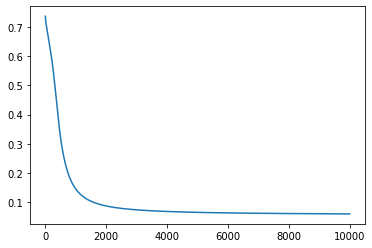

In [18]:
nInputs = 2
nHidden = 4
nOutput = 1

model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Tanh(),                
    torch.nn.Linear(nHidden, nOutput),
    torch.nn.Sigmoid(),    
    ) 

if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')
learningRate = 0.05 

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)   
errors = train_model(10000) 
plt.plot(errors)

O erro caiu como esperado. Falta ver agora como o espaço foi separado.

No espaço de entrada, vamos marcar em verde a região do espaço que é classificada como pertencente à classe B.

Além disso, vamos mostrar as linhas de divisão criadas pelos  neurônios intermediários.

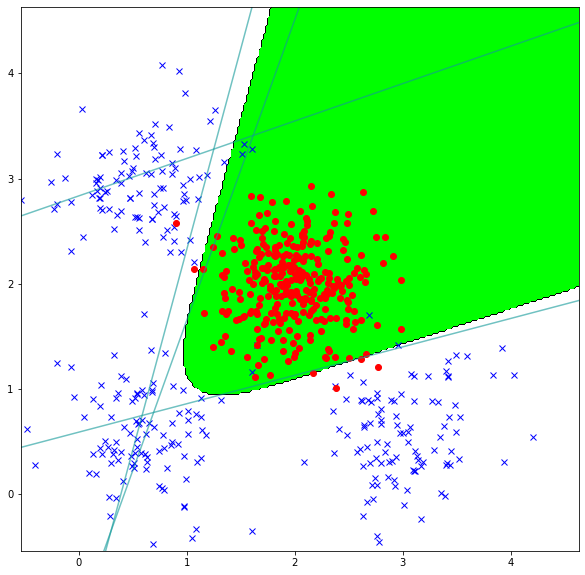

In [16]:
from matplotlib import cm
delta = 0.02
m = x_train.min()
M = 1.1*x_train.max()
X, Y = np.meshgrid(np.arange(m,M,delta),np.arange(m,M,delta))
inputs = []
for x0 in np.arange(m,M,delta):
  for x1 in np.arange(m,M,delta):
    inputs.append([x0,x1])
inputs = np.array(inputs)
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    inputs = torch.tensor(inputs, dtype=torch.float32).to('cuda')
  else:
    inputs = torch.tensor(inputs, dtype=torch.float32)
  saidas = model(inputs)
y_pred = saidas.detach().numpy()  
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0
L = int(np.sqrt(len(y_pred)))
y_pred = y_pred.reshape(L,L)
ax = plt.figure(figsize=(10,10))
plt.contourf(X, Y,y_pred, levels=2, colors=['#ffffff','#000000','#00ff00'])
plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
plt.axis([m,M,m,M]);

xt = np.linspace(-1,5,100)
for i in range(0,nHidden):
  b = model[0].bias.detach().numpy()[i]
  w = model[0].weight[i].detach().numpy()
  yt = (-b - xt*w[0])/w[1]
  plt.plot(xt,yt, color='#11999999')
plt.show()



---
---


##**O que vimos**
Regressão logística para a classificação binária, com apenas uma camada, funcionando bem para uma situação em que as classes são linearmente separáveis.

Regressão logística para classificação binária usando mais de uma camada.

##**Do Pytorch**

torch.nn.BCELoss() 